In [1]:
from rdkit import Chem, rdBase
from rdkit.Chem import Draw,rdDepictor
from rdkit.Chem import AllChem, Descriptors, DataStructs
from rdkit.Chem.Draw import IPythonConsole, rdMolDraw2D
from rdkit.Chem.Scaffolds import rdScaffoldNetwork
from datetime import datetime
import math
import matplotlib as mpl
from matplotlib import pyplot as plt
import os
import pyvis
from pyvis.network import Network
import inspect
import psycopg2
from collections import defaultdict

print('RDKit version: ',rdBase.rdkitVersion)
print('MatplotLib version:', mpl.__version__)
print('Pyvis version:', pyvis.__version__)
#now = datetime.now()
print(datetime.now())



RDKit version:  2020.03.3
MatplotLib version: 3.3.2
Pyvis version: 0.1.8.2
2021-01-31 22:59:56.866651


Connecting to the PostgreSQL database...
2021-01-31 23:00:05.416700
PostgreSQL database version:
('PostgreSQL 12.5 (Ubuntu 12.5-0ubuntu0.20.04.1) on x86_64-pc-linux-gnu, compiled by gcc (Ubuntu 9.3.0-17ubuntu1~20.04) 9.3.0, 64-bit',)
Cc1nccn1CCCCc1ccc(CC(=O)N[C@H](CO)Cc2ccc(OCCC3CCCCC3)c(CCCCN)c2)cc1  -  602.8640000000003
Cc1nccn1CCCCc1ccc(CC(=O)N[C@@H](CO)Cc2ccc(OCCC3CCCCC3)c(CCCN)c2)cc1  -  588.8370000000003
Cc1nccn1CCCCc1ccc(CC(=O)N[C@H](CO)Cc2ccc(OCCC3CCCCC3)c(CCCN)c2)cc1  -  588.8370000000003
CCc1nc(O)c2c(n1)Nc1ccccc1C2  -  227.267
Cc1nc(NS(=O)(=O)c2cccc3c(N(C)C)cccc23)ccc1Br  -  420.33200000000005
CCCc1nc(Br)cnc1NS(=O)(=O)c1cccc2c(N(C)C)cccc12  -  449.37400000000025
CCc1nc(Br)cnc1NS(=O)(=O)c1cccc2c(N(C)C)cccc12  -  435.3470000000002
Cc1nc(Br)cnc1NS(=O)(=O)c1cccc2c(N(C)C)cccc12  -  421.32000000000016
CN/C(=N/CCSCc1nc[nH]c1C)NC#N  -  252.347
c1ccc2c(c1)CCCc1nc(-c3ccncc3)[nH]c1-2  -  261.32800000000003
C/C(=C\Cn1oc(=O)[nH]c1=O)c1ccccc1OCc1nc(-c2ccc(C(F)(F)F)cc2)oc1C  -  487.43400000

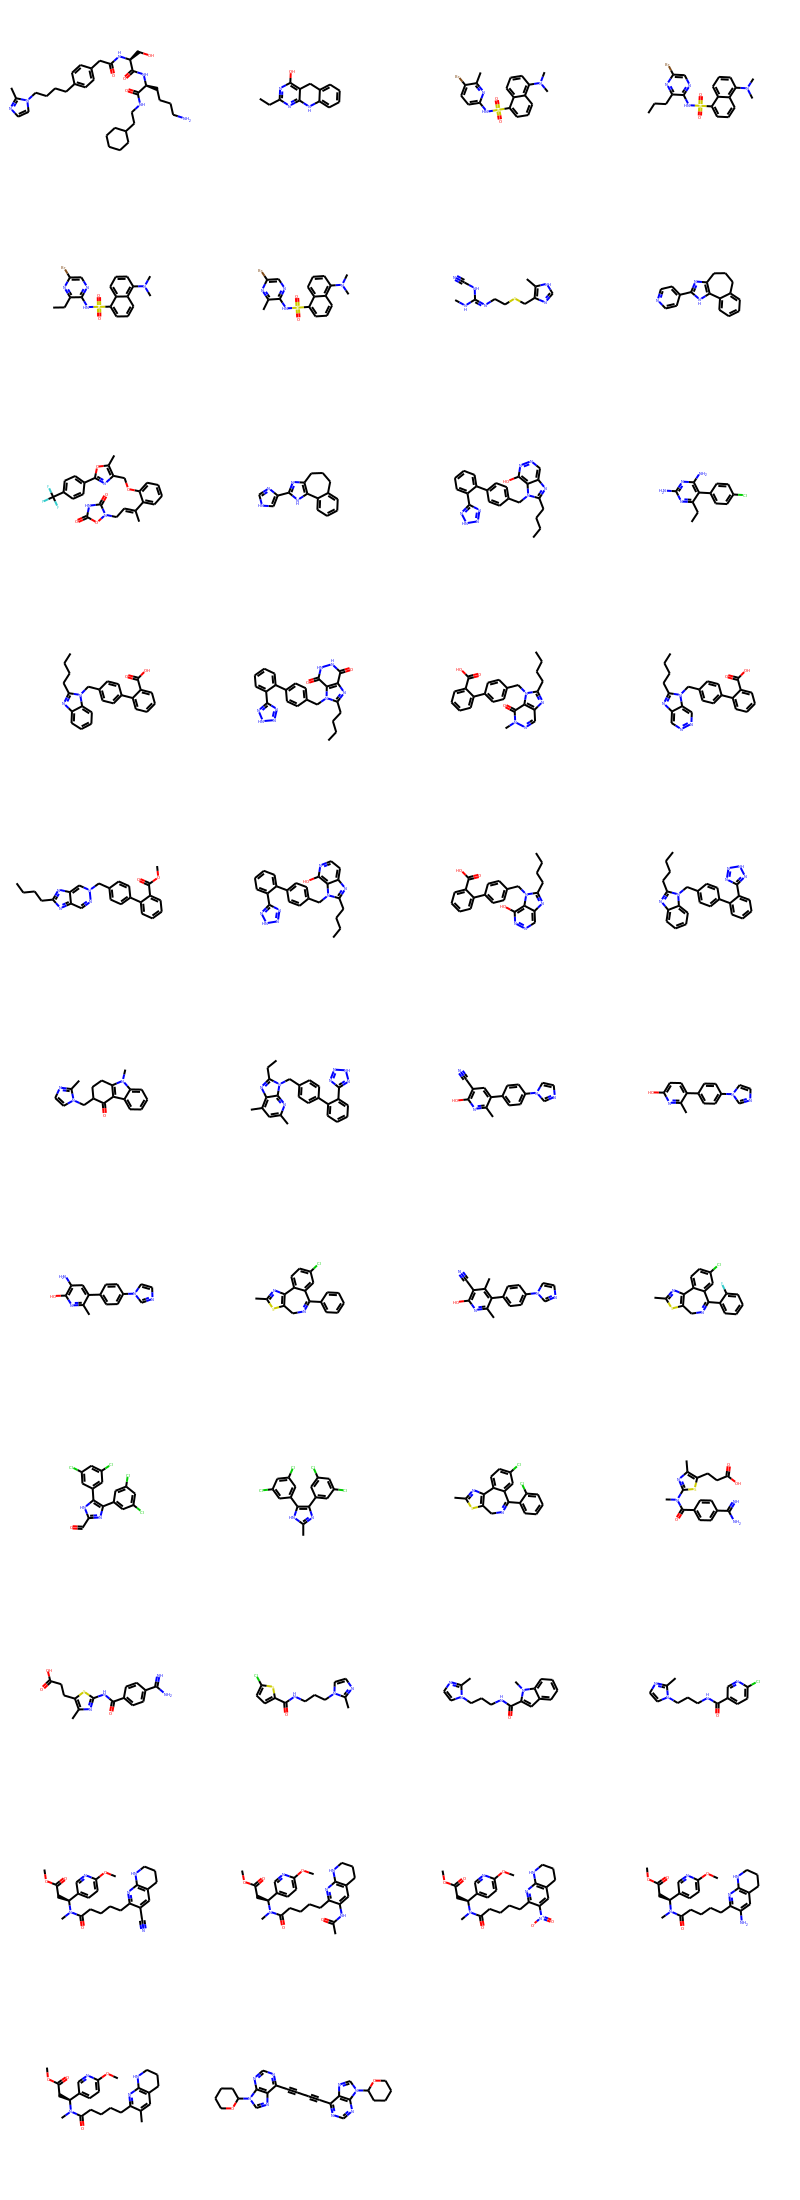

In [2]:
print('Connecting to the PostgreSQL database...')
#now = datetime.now()
print(datetime.now())

conn = psycopg2.connect(host = "localhost", dbname="chembl_27", user="postgres", password="postgres")
# crpeate a cursor

cur = conn.cursor()
# execute a statement

print('PostgreSQL database version:') 
cur.execute('SELECT version()')
#display the PostgreSQL database server version

db_version = cur.fetchone() 
print(db_version)

size=50
probe="'%Cc1nc%'" 
cur = conn.cursor() 
sql = "SELECT canonical_smiles, molregno FROM compound_structures WHERE canonical_smiles LIKE "+probe 
params = rdScaffoldNetwork.ScaffoldNetworkParams()

cur.execute(sql) 
row = cur.fetchone()
mol = [row[0]]
tmol = Chem.MolFromSmiles(row[0])
chrw = [tmol]
rn=1 
while row is not None and rn<size: 
    #print(row)
    row = cur.fetchone()
    #print(row[0])
    mol.append(row[0])
    tmol = Chem.MolFromSmiles(row[0])
    mw = Chem.Descriptors.MolWt(tmol)
    print(row[0], ' - ',mw)
    #print(mol)
    #print(rn)     
    if mw<500:
        chrw.append(tmol) 
    #
    #smi = Chem.MolToSmiles(chrw)
    #print(smi)
    #Draw.MolToImage(chrw , size=(300, 300)) #, kekulize=True, wedgeBonds=True, fitImage=False, options=None, canvas=None, **kwargs)
    #Draw.MolsToGridImage(chrw, molsPerRow=1)
    rn=rn+1
#print(smi_list)

# print(mol)
Draw.MolsToGridImage(chrw, molsPerRow=4)


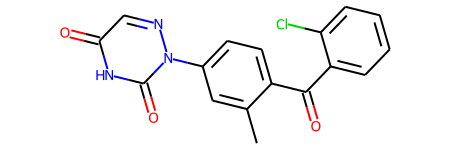

In [29]:
chrw

11
{98513984: ((3, 1), (4, 1), (5, 1)), 422715066: ((0, 1),), 908339072: ((1, 2),), 951226070: ((2, 1), (6, 1)), 2246728737: ((0, 0),), 2763854213: ((4, 2),), 3207567135: ((1, 1),), 3217380708: ((1, 0),), 3218693969: ((2, 0), (3, 0), (4, 0), (5, 0), (6, 0)), 3999906991: ((3, 2), (5, 2)), 4244175903: ((2, 2), (6, 2))}
8
{0: ((0, 0),), 4: ((1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0)), 333654730: ((1, 2),), 594405804: ((1, 1),), 1230563926: ((3, 2), (4, 2), (5, 2)), 3205496001: ((0, 1),), 3532240404: ((2, 2), (6, 2)), 3764344801: ((2, 1), (3, 1), (4, 1), (5, 1), (6, 1))}
19 <class 'dict'>
{422715066: ((0, 1),), 951226070: ((2, 1),), 1016841875: ((7, 0),), 1237992904: ((1, 2),), 1349404210: ((4, 2),), 1524398717: ((2, 2),), 1717044408: ((3, 2),), 2041434490: ((4, 0),), 2246728737: ((0, 0),), 2424973678: ((6, 1),), 3118255683: ((4, 1),), 3124581743: ((1, 1),), 3217380708: ((1, 0), (6, 0)), 3218693969: ((2, 0), (3, 0), (5, 0)), 3264841329: ((5, 2),), 3452535345: ((7, 1),), 3776905034: ((3

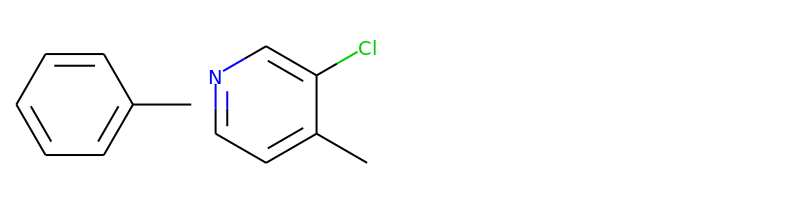

In [3]:
m1 = Chem.MolFromSmiles("Cc1ccccc1")
gmol = [m1]
bi1={}
fbi1={}
fp1 = AllChem.GetMorganFingerprint(m1,2, bitInfo=bi1)
ffp1 = AllChem.GetMorganFingerprint(m1,2, useFeatures=True, bitInfo=fbi1)
# len(fp1.GetNonzeroElements())
print(len(bi1))
print(bi1)
print(len(fbi1))
print(fbi1)
print(fp1)
m2 = Chem.MolFromSmiles("Cc1ccncc1Cl")
gmol.append(m2)
bi2={}
fbi2={}
fp2 = AllChem.GetMorganFingerprint(m2,2, bitInfo=bi2)
ffp2 = AllChem.GetMorganFingerprint(m2,2, bitInfo=fbi2, useFeatures=True)
# len(fp1.GetNonzeroElements())
print(len(bi2), type(bi2))
print(bi2)
print(len(fbi1))
print(fbi2)
print(fp2)
print(DataStructs.DiceSimilarity(fp1, fp2))
print(DataStructs.DiceSimilarity(ffp1, ffp2))
Draw.MolsToGridImage(gmol, molsPerRow=4)

In [32]:
print(bi1)

for fp,v in bi1.items():
    print(fp,' - ',len(v),' - ',v)

print(bi2)

for fp,v in bi2.items():
    print(fp,' - ',len(v),' - ',v)
    
fp_bits = bi1
    
print(fp_bits)

for fp,v in fp_bits.items():
    print(fp,' - ',len(v),' - ',v)
    
print('Adding Values')
    
for fp,v in bi2.items():
    if fp in fp_bits:
        print('Existing: ',fp,' - ',len(v),' - ',v)
    else:
        print('New: ',fp,' - ',len(v),' - ',v)



{98513984: ((3, 1), (4, 1), (5, 1)), 422715066: ((0, 1),), 908339072: ((1, 2),), 951226070: ((2, 1), (6, 1)), 2246728737: ((0, 0),), 2763854213: ((4, 2),), 3207567135: ((1, 1),), 3217380708: ((1, 0),), 3218693969: ((2, 0), (3, 0), (4, 0), (5, 0), (6, 0)), 3999906991: ((3, 2), (5, 2)), 4244175903: ((2, 2), (6, 2))}
98513984  -  3  -  ((3, 1), (4, 1), (5, 1))
422715066  -  1  -  ((0, 1),)
908339072  -  1  -  ((1, 2),)
951226070  -  2  -  ((2, 1), (6, 1))
2246728737  -  1  -  ((0, 0),)
2763854213  -  1  -  ((4, 2),)
3207567135  -  1  -  ((1, 1),)
3217380708  -  1  -  ((1, 0),)
3218693969  -  5  -  ((2, 0), (3, 0), (4, 0), (5, 0), (6, 0))
3999906991  -  2  -  ((3, 2), (5, 2))
4244175903  -  2  -  ((2, 2), (6, 2))
{422715066: ((0, 1),), 951226070: ((2, 1),), 1016841875: ((7, 0),), 1237992904: ((1, 2),), 1349404210: ((4, 2),), 1524398717: ((2, 2),), 1717044408: ((3, 2),), 2041434490: ((4, 0),), 2246728737: ((0, 0),), 2424973678: ((6, 1),), 3118255683: ((4, 1),), 3124581743: ((1, 1),), 321738

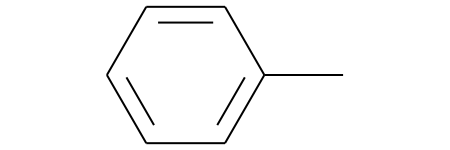

In [6]:
m1

In [20]:
fp1

ArgumentError: Python argument types in
    rdkit.DataStructs.cDataStructs.ConvertToNumpyArray(UIntSparseIntVect)
did not match C++ signature:
    ConvertToNumpyArray(RDKit::SparseIntVect<unsigned long> bv, boost::python::api::object destArray)
    ConvertToNumpyArray(RDKit::SparseIntVect<unsigned int> bv, boost::python::api::object destArray)
    ConvertToNumpyArray(RDKit::SparseIntVect<long> bv, boost::python::api::object destArray)
    ConvertToNumpyArray(RDKit::SparseIntVect<int> bv, boost::python::api::object destArray)
    ConvertToNumpyArray(RDKit::DiscreteValueVect bv, boost::python::api::object destArray)
    ConvertToNumpyArray(ExplicitBitVect bv, boost::python::api::object destArray)

AttributeError: 'UIntSparseIntVect' object has no attribute 'GetNumBits'

In [2]:
print('Connecting to the PostgreSQL database...')
#now = datetime.now()
print(datetime.now())

chem = psycopg2.connect(host = "localhost", dbname="Chemistry", user="postgres", password="postgres")
# create a cursor

cur = chem.cursor()
# execute a statement

print('PostgreSQL database version:') 
cur.execute('SELECT version()')
#display the PostgreSQL database server version

db_version = cur.fetchone() 
print(db_version)

print('RDKIT version:') 
cur.execute('SELECT rdkit_version()')
#display the PostgreSQL database server version

db_version = cur.fetchone() 
print(db_version)

Connecting to the PostgreSQL database...
2021-01-20 22:56:30.384817
PostgreSQL database version:
('PostgreSQL 12.5 (Ubuntu 12.5-0ubuntu0.20.04.1) on x86_64-pc-linux-gnu, compiled by gcc (Ubuntu 9.3.0-17ubuntu1~20.04) 9.3.0, 64-bit',)
RDKIT version:
('0.74.0',)


SELECT "Structure_ID", "SMILES" FROM public."Structures"
CCN
11  -  CCN  -  45.084999999999994
CCC
13  -  CCC  -  44.096999999999994
CSC
14  -  CSC  -  62.137
CCSCC
15  -  CCSCC  -  90.191
CCCC
16  -  CCCC  -  58.123999999999995
c1ccccc1
17  -  c1ccccc1  -  78.11399999999999
c1cnccc1
18  -  c1cnccc1  -  79.10199999999999
Cc1ccccc1
19  -  Cc1ccccc1  -  92.14099999999999
Cc1ccncc1
20  -  Cc1ccncc1  -  93.12899999999999
Cc1cccnc1
21  -  Cc1cccnc1  -  93.129
Cc1ccncc1Cl
22  -  Cc1ccncc1Cl  -  127.574
Cc1c(N)cncc1Cl
23  -  Cc1c(N)cncc1Cl  -  142.589
CCOCC
24  -  CCOCC  -  74.123
CCNCC
34  -  CCNCC  -  73.139
CCSC
35  -  CCSC  -  76.164
CCPCC
36  -  CCPCC  -  90.10600000000001
CCOP(=O)C
37  -  CCOP(=O)C  -  108.07699999999998
CCCNCC
38  -  CCCNCC  -  87.166


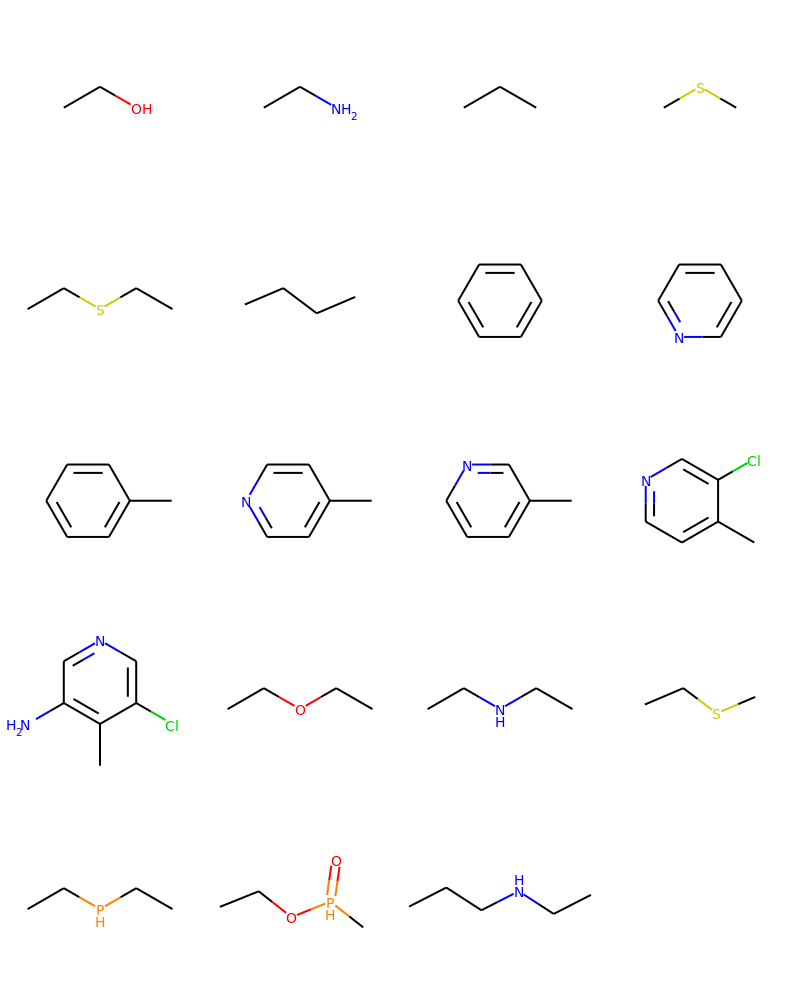

In [3]:
size=19
# probe="'%Cc1nc%'" 
cur = chem.cursor() 
sql = 'SELECT "Structure_ID", "SMILES" FROM public."Structures"' 
params = rdScaffoldNetwork.ScaffoldNetworkParams()
print(sql)

cur.execute(sql) 
row = cur.fetchone()
mol = [row[1]]
tmol = Chem.MolFromSmiles(row[1])
# tmol = row[2]
chrw = [tmol]
rn=1 
while row is not None and rn<size: 
    #print(row)
    row = cur.fetchone()
    print(row[1])
    mol.append(row[1])
    tmol = Chem.MolFromSmiles(row[1])
    # tmol = row[2]
    mw = Chem.Descriptors.MolWt(tmol)
    print(row[0], ' - ',row[1],' - ',mw)
    #print(mol)
    #print(rn)     
    if mw<500:
        chrw.append(tmol) 
    #
    #smi = Chem.MolToSmiles(chrw)
    #print(smi)
    #Draw.MolToImage(chrw , size=(300, 300)) #, kekulize=True, wedgeBonds=True, fitImage=False, options=None, canvas=None, **kwargs)
    #Draw.MolsToGridImage(chrw, molsPerRow=1)
    rn=rn+1
# print(smi_list)

# print(mol)
Draw.MolsToGridImage(chrw, molsPerRow=4)

In [8]:
import collections

#cur = chem.cursor() 
#sql = 'SELECT "Structure_ID", "SMILES" FROM public."Structures"' 
#cur.execute(sql) 

#mollist = cur.fetchall()
#print(len(mollist))
#print(mollist)

mollist = [(10, 'CCO'), (11, 'CCN'), (13, 'CCC'), (14, 'CSC'), (15, 'CCSCC'), (16, 'CCCC'), (17, 'c1ccccc1'), (18, 'c1cnccc1'), (19, 'Cc1ccccc1'), (20, 'Cc1ccncc1'), (21, 'Cc1cccnc1'), (22, 'Cc1ccncc1Cl'), (23, 'Cc1c(N)cncc1Cl')]

fp_key = {}
fp_val = []
fp_dict = collections.defaultdict(list)

for mol in mollist:
    print()
    print(mol)
    print(mol[0], mol[1])
    bi ={}
    m = Chem.MolFromSmiles(mol[1])
    fp = AllChem.GetMorganFingerprint(m,3, bitInfo=bi)
    # print(len(bi))
    # print(bi)
    # print(fp)
    
    for fpb,v in bi.items():
        a = v[0][0]
        r = v[0][1]
        if r > 0:
            env = Chem.FindAtomEnvironmentOfRadiusN(m,r,a)
            amap={}
            submol=Chem.PathToSubmol(m,env,atomMap=amap)
            sm =Chem.MolToSmiles(submol)
        else:
            am = m.GetAtomWithIdx(a)
            sm = am.GetSymbol()
            if am.GetIsAromatic():
                sm = sm.lower()
                       
        print(fpb,' - ',len(v),' - ',v,' - ',a,' - ',r,' - ',sm)

        # mfp2_svg = Draw.DrawMorganBit(mol, fpb, bi, useSVG=True)
        # key = fbp
        fp_dict[fpb].append(len(v))

print()        
print(fp_dict)
print(len(fp_dict),'fingerprints')

for fpb,v in fp_dict.items():
    print(fpb,' - ',len(v),' - ',v)
        # key = fbp
        #fp_dict[fpb].append(len(v))


(10, 'CCO')
10 CCO
864662311  -  1  -  ((2, 0),)  -  2  -  0  -  O
1535166686  -  1  -  ((2, 1),)  -  2  -  1  -  CO
2245384272  -  1  -  ((1, 0),)  -  1  -  0  -  C
2246728737  -  1  -  ((0, 0),)  -  0  -  0  -  C
3542456614  -  1  -  ((0, 1),)  -  0  -  1  -  CC
4018048386  -  1  -  ((1, 1),)  -  1  -  1  -  CCO

(11, 'CCN')
11 CCN
772817685  -  1  -  ((1, 1),)  -  1  -  1  -  CCN
847957139  -  1  -  ((2, 0),)  -  2  -  0  -  N
2245384272  -  1  -  ((1, 0),)  -  1  -  0  -  C
2246728737  -  1  -  ((0, 0),)  -  0  -  0  -  C
2592785365  -  1  -  ((2, 1),)  -  2  -  1  -  CN
3542456614  -  1  -  ((0, 1),)  -  0  -  1  -  CC

(13, 'CCC')
13 CCC
2068133184  -  1  -  ((1, 1),)  -  1  -  1  -  CCC
2245384272  -  1  -  ((1, 0),)  -  1  -  0  -  C
2246728737  -  2  -  ((0, 0), (2, 0))  -  0  -  0  -  C
3542456614  -  2  -  ((0, 1), (2, 1))  -  0  -  1  -  CC

(14, 'CSC')
14 CSC
1026928756  -  1  -  ((1, 0),)  -  1  -  0  -  S
2246728737  -  2  -  ((0, 0), (2, 0))  -  0  -  0  -  C
259225229

SELECT "Structure_ID", "SMILES" FROM public."Structures"
[(10, 'CCO'), (11, 'CCN'), (13, 'CCC'), (14, 'CSC'), (15, 'CCSCC'), (16, 'CCCC'), (17, 'c1ccccc1'), (18, 'c1cnccc1'), (19, 'Cc1ccccc1'), (20, 'Cc1ccncc1'), (21, 'Cc1cccnc1'), (22, 'Cc1ccncc1Cl'), (23, 'Cc1c(N)cncc1Cl'), (24, 'CCOCC'), (34, 'CCNCC'), (35, 'CCSC'), (36, 'CCPCC'), (37, 'CCOP(=O)C'), (38, 'CCCNCC')]
{10: <rdkit.Chem.rdchem.Mol object at 0x7f3083714990>, 11: <rdkit.Chem.rdchem.Mol object at 0x7f3083714800>, 13: <rdkit.Chem.rdchem.Mol object at 0x7f30837148a0>, 14: <rdkit.Chem.rdchem.Mol object at 0x7f3083714030>, 15: <rdkit.Chem.rdchem.Mol object at 0x7f3083c9c530>, 16: <rdkit.Chem.rdchem.Mol object at 0x7f3083c9c800>, 17: <rdkit.Chem.rdchem.Mol object at 0x7f30b597a350>, 18: <rdkit.Chem.rdchem.Mol object at 0x7f3083c9a490>, 19: <rdkit.Chem.rdchem.Mol object at 0x7f30b40c7cb0>, 20: <rdkit.Chem.rdchem.Mol object at 0x7f30b40c7ee0>, 21: <rdkit.Chem.rdchem.Mol object at 0x7f3083c8dc60>, 22: <rdkit.Chem.rdchem.Mol object 

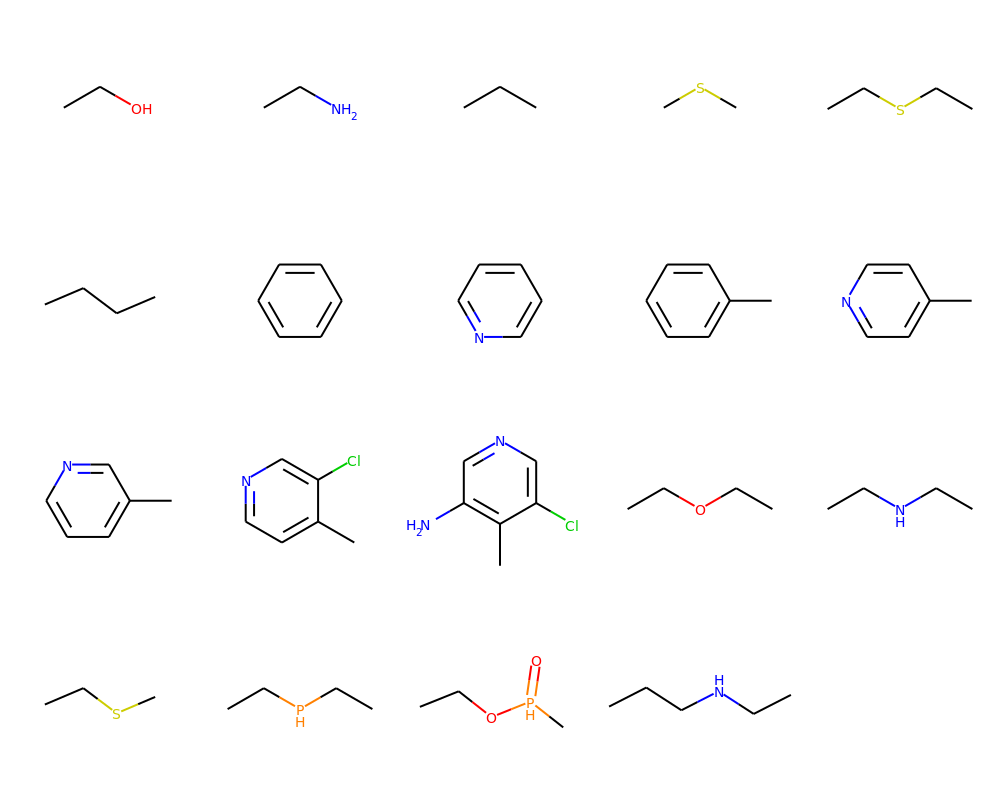

In [11]:
cur = chem.cursor() 
sql = 'SELECT "Structure_ID", "SMILES" FROM public."Structures"' 
params = rdScaffoldNetwork.ScaffoldNetworkParams()
print(sql)
cur.execute(sql) 
molset = cur.fetchall()
print(molset)

mol = []
# tmol = Chem.MolFromSmiles(row[1])
# tmol = row[2]
chrw = []
moldict = {}
# rn=1 
for m in molset: 
    mol.append(m[1])
    tmol = Chem.MolFromSmiles(m[1])
    chrw.append(tmol) 
    moldict[m[0]] = tmol

print(moldict)
print(chrw)

# print(mol)
Draw.MolsToGridImage(chrw, molsPerRow=5)